# Solution

In [42]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Load the data
raw_data = pd.read_csv('./source/38,102,104, 84.csv', encoding='utf-8')
raw_data.head()

,circuit_uuid,exp_id,run_uuid,chip_id,chip_ver,chip_idx,cir_idx,cir_ver,cir_vers,overall_idx,...,fill_factor_initial,included,neg,neg_0,neg_1,pos_0,pos_0_inc,pos_1,pos_1_inc,total_droplets
0,1a98c2ab-487a-42a8-b290-74a798e905be,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,0,NaN,NaN,0,...,1.0,21551,21061,21061,21551,506,490,0,0,23135
1,79ac9af0-279b-4424-a6ca-80121c653d43,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,1,NaN,NaN,1,...,1.0,20894,20416,20416,20894,485,478,0,0,22031
2,6920caef-ddfb-4202-96fd-282541fa73b7,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,2,NaN,NaN,2,...,1.0,22497,22046,22046,22497,459,451,0,0,24168
3,cb9f207f-099a-48f8-9053-d681e4f73cf5,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,3,NaN,NaN,3,...,1.0,20462,19957,19957,20462,508,505,0,0,21581
4,c6409fd6-b632-452e-8c25-aff70e5f120c,EXP-VGXT8LA5,10ab869d-6439-44be-9013-025905656caf,VF6J7L4S,v4,0,4,NaN,NaN,4,...,1.0,21401,20914,20914,21401,515,487,0,0,23102


In [44]:
# Fiter the raw data, keep columns: reaction, specimen， fill_factor_final, fill_factor_initial, doublets, total_droplets
columns_to_keep = ['reaction', 'specimen', 'fill_factor_final', 'fill_factor_initial', 'doublets', 'total_droplets']
filtered_data = raw_data[columns_to_keep]
filtered_data.head()

,reaction,specimen,fill_factor_final,fill_factor_initial,doublets,total_droplets
0,NK-R38,LR-S007-0528,1.0,1.0,57,23135
1,NK-R38,LR-S007-0528,1.0,1.0,48,22031
2,NK-R38,LR-S007-0528,1.0,1.0,34,24168
3,NK-R38,LR-S007-0528,1.0,1.0,42,21581
4,NK-R38,LR-S007-0528,1.0,1.0,51,23102


## Fig 2: doublets formed (measures how many drops coalesced)

/var/folders/87/qvvcb7_s1jddn7tjwc25qz1m0000gn/T/ipykernel_83498/1562864873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


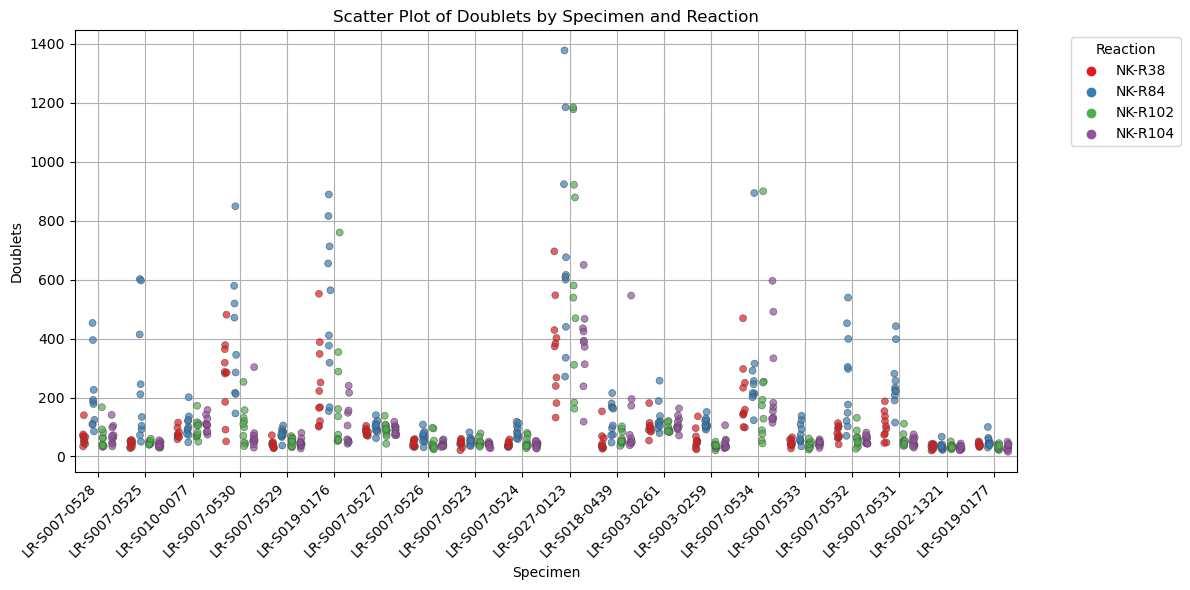

In [49]:
# 替换无穷大值为NaN
filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Scatter plot
plt.figure(figsize=(12, 6))
sns.stripplot(x='specimen', y='doublets', hue='reaction', data=filtered_data,
              jitter=True, palette="Set1", dodge=True, alpha=0.7, linewidth=0.5)

plt.xlabel('Specimen')
plt.ylabel('Doublets')
plt.title('Scatter Plot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # 调整图表布局
plt.show()

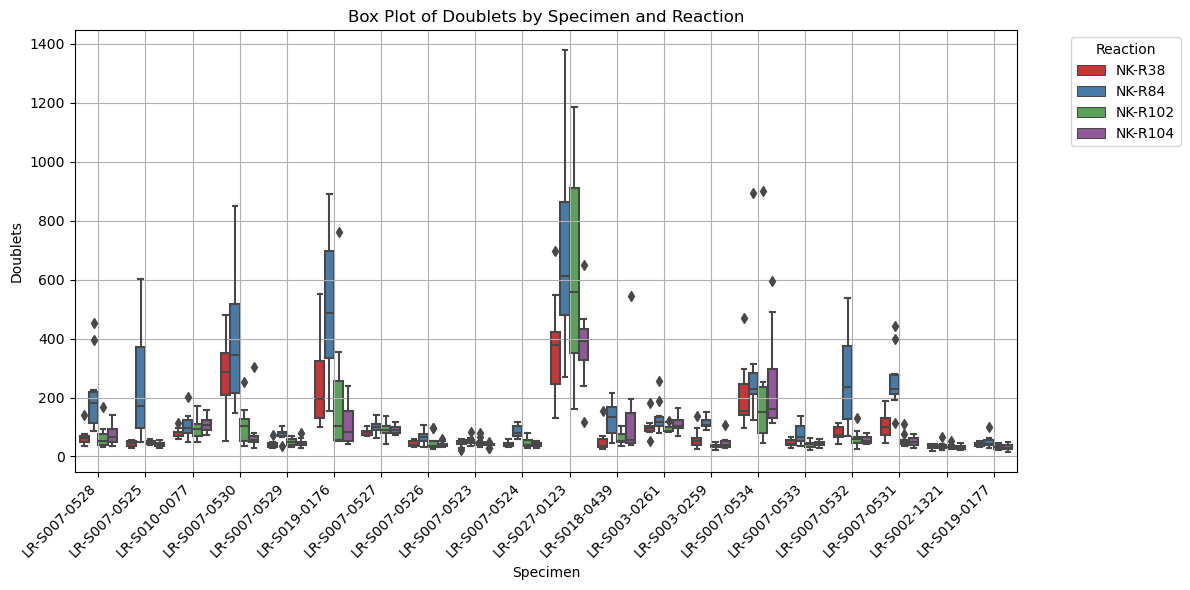

In [50]:
# 绘制箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='specimen', y='doublets', hue='reaction',
            data=filtered_data, palette="Set1", dodge=True)

plt.xlabel('Specimen')
plt.ylabel('Doublets')
plt.title('Box Plot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # 调整图表布局
plt.show()

/var/folders/87/qvvcb7_s1jddn7tjwc25qz1m0000gn/T/ipykernel_83498/1163004124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


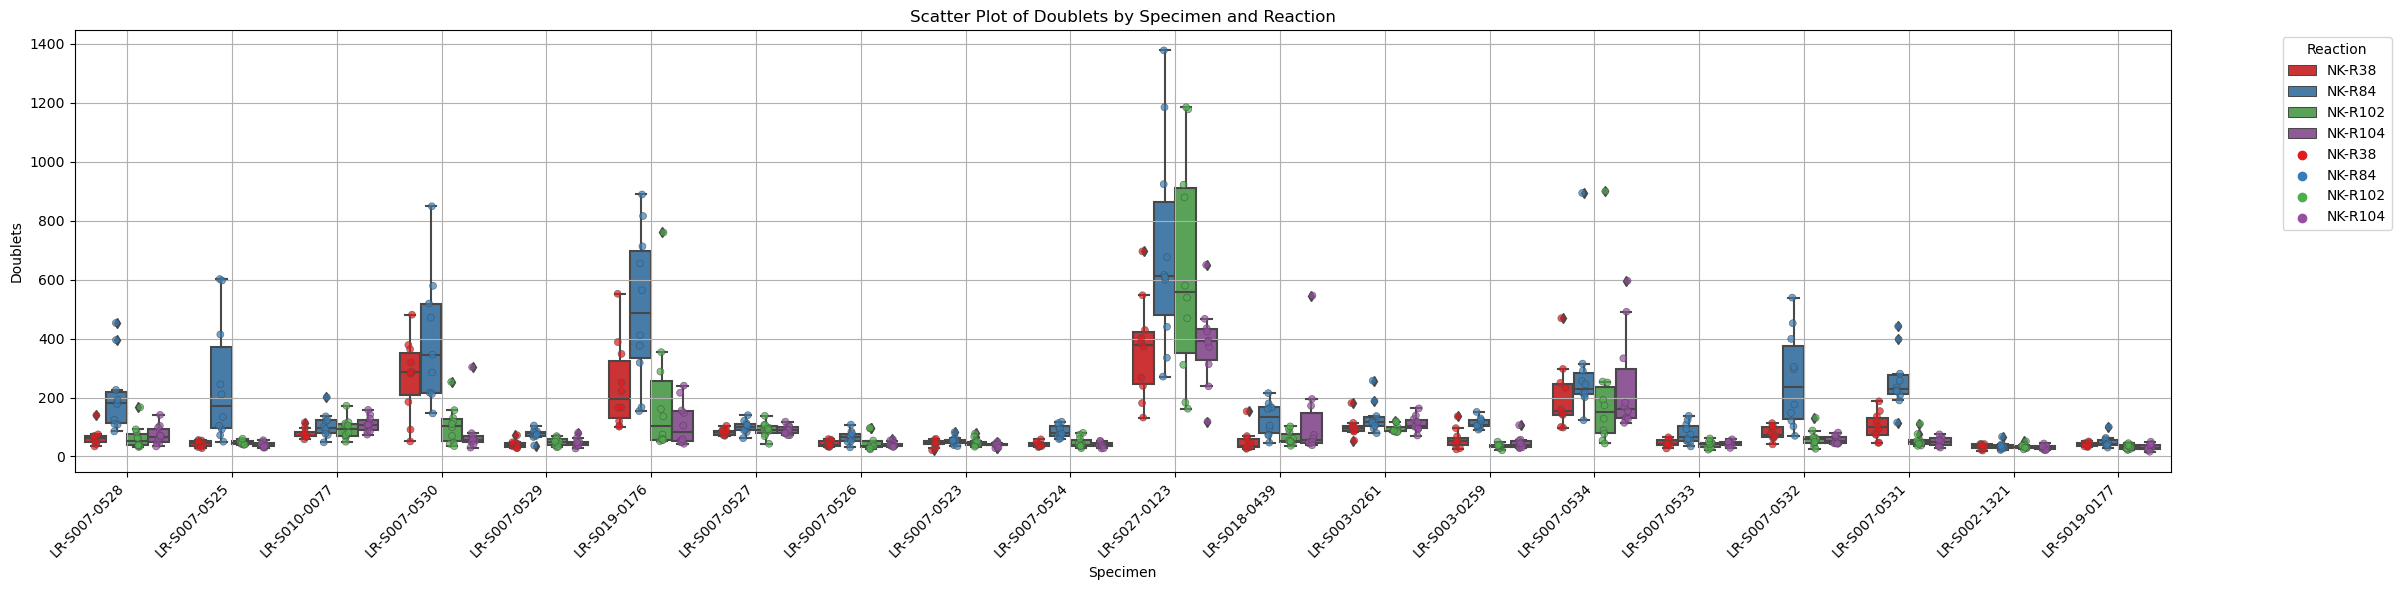

In [51]:
# Replace inf values with NaN
filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(24, 6))

# Use seaborn's boxplot to create a box plot
sns.boxplot(x='specimen', y='doublets', hue='reaction',
            data=filtered_data, palette="Set1", dodge=True)

# Use seaborn's stripplot to create a scatter plot and add jitter effect
sns.stripplot(x='specimen', y='doublets', hue='reaction', data=filtered_data,
              jitter=True, palette="Set1", dodge=True, alpha=0.7, linewidth=0.5)

plt.xlabel('Specimen')
plt.ylabel('Doublets')
plt.title('Scatter Plot of Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout of the plot
plt.show()

## Fig3：Total droplets (when this number drops, its also a sign that droplets coalesced)

/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


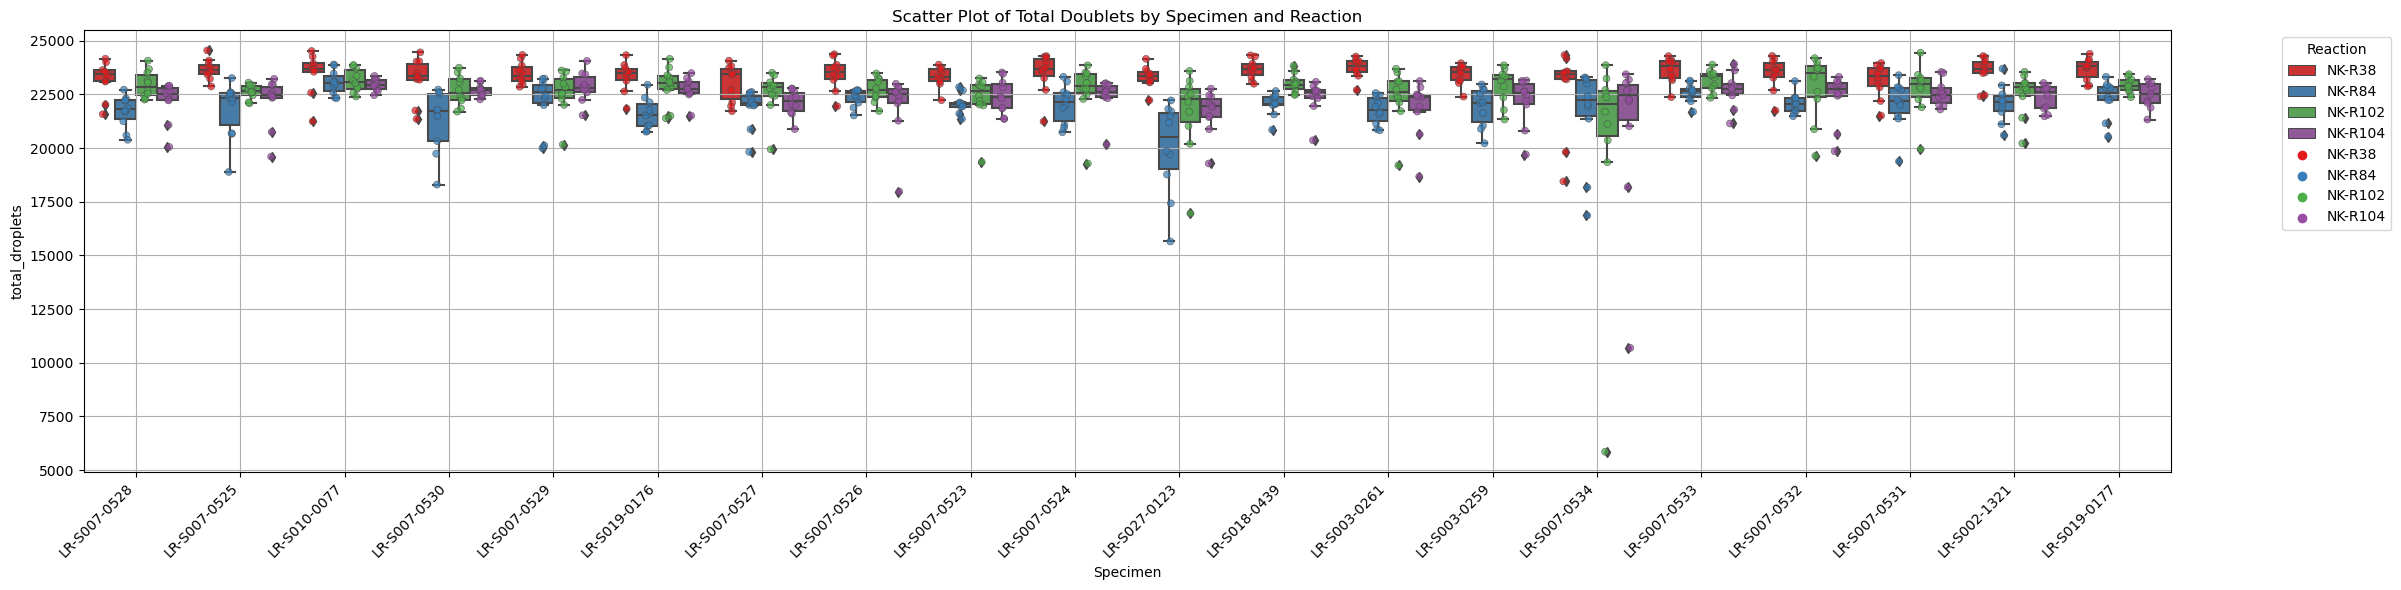

In [52]:
plt.figure(figsize=(24, 6))

# Use seaborn's boxplot to create a box plot
sns.boxplot(x='specimen', y='total_droplets', hue='reaction', data=filtered_data, palette="Set1", dodge=True)

# Use seaborn's stripplot to create a scatter plot and add jitter effect
sns.stripplot(x='specimen', y='total_droplets', hue='reaction', data=filtered_data, jitter=True, palette="Set1", dodge=True, alpha=0.7, linewidth=0.5)

plt.xlabel('Specimen')
plt.ylabel('total_droplets')
plt.title('Scatter Plot of Total Doublets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout of the plot
plt.show()

/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


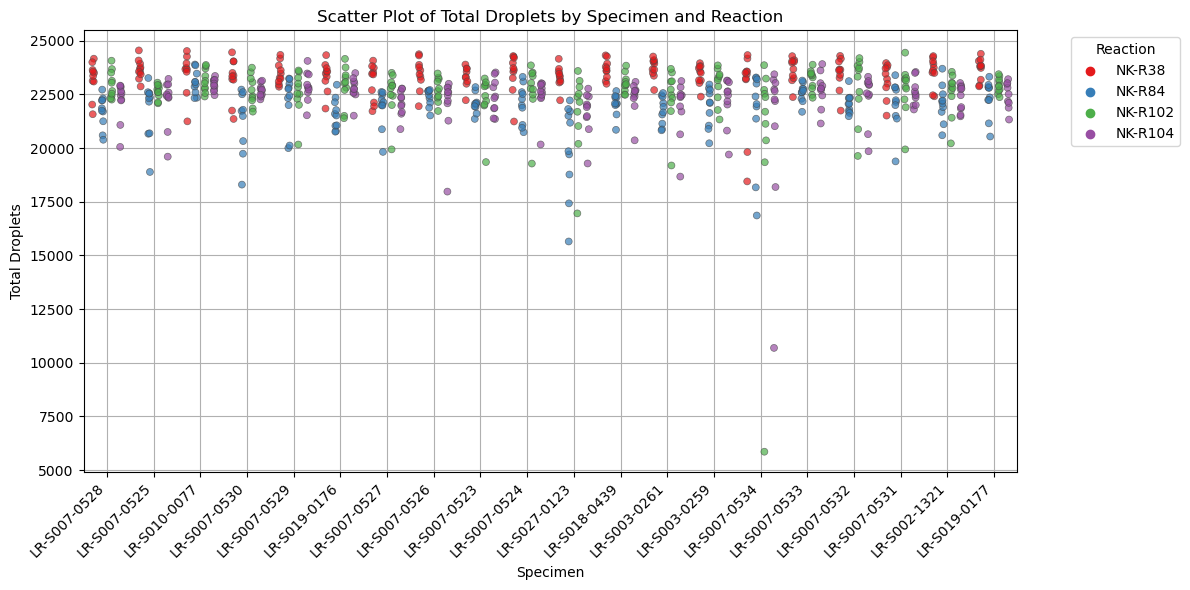

In [53]:
# 绘制散点图
plt.figure(figsize=(12, 6))
sns.stripplot(x='specimen', y='total_droplets', hue='reaction', data=filtered_data,
              jitter=True, palette="Set1", dodge=True, alpha=0.7, linewidth=0.5)

plt.xlabel('Specimen')
plt.ylabel('Total Droplets')
plt.title('Scatter Plot of Total Droplets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # 调整图表布局
plt.show()

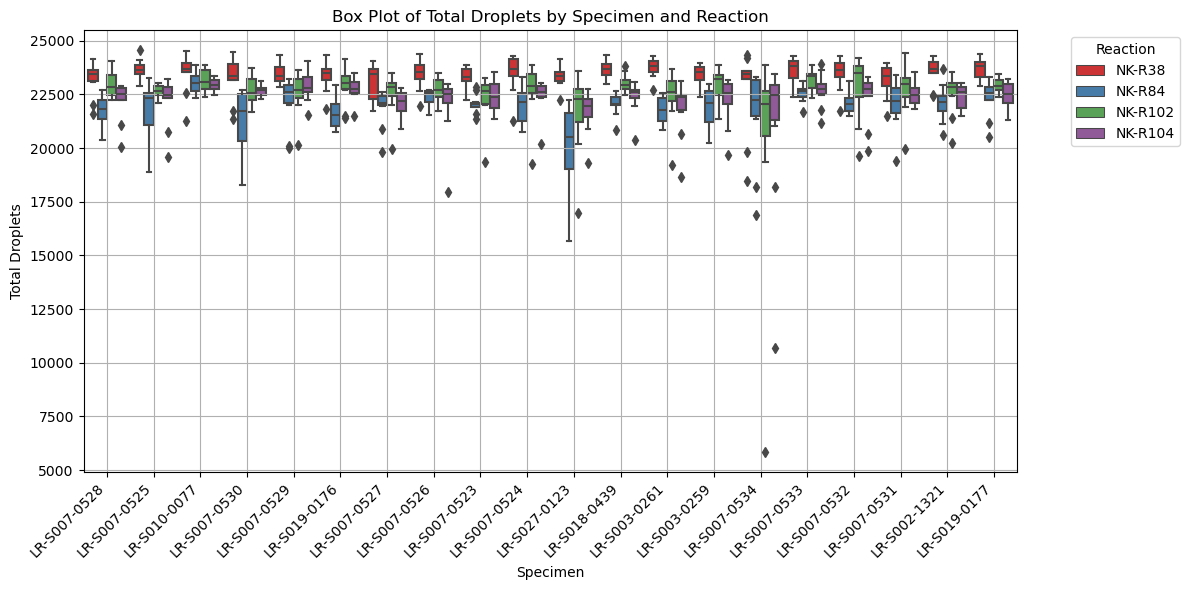

In [54]:
# 绘制箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='specimen', y='total_droplets', hue='reaction',
            data=filtered_data, palette="Set1", dodge=True)

plt.xlabel('Specimen')
plt.ylabel('Total Droplets')
plt.title('Box Plot of Total Droplets by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # 调整图表布局
plt.show()

## Fig 4：Fill factor intial/fillfactor final (when this number moves away from 1, its means droplets coalesced) 

/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/steveyuan/anaconda3/envs/python312/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


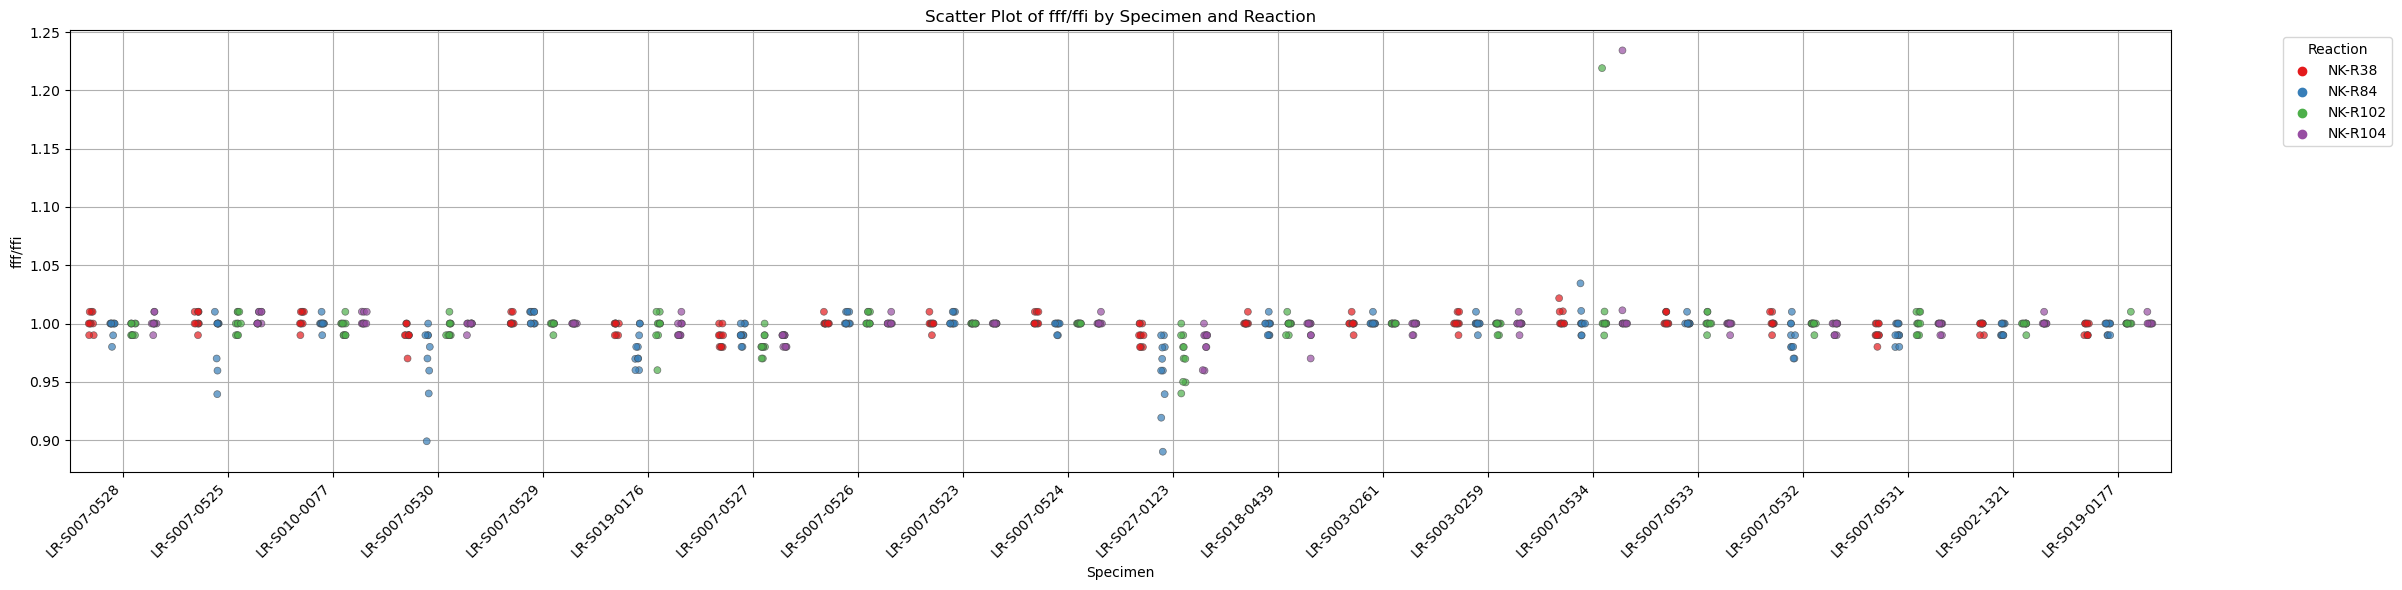

In [55]:
y_axis = filtered_data['fill_factor_final'] / filtered_data['fill_factor_initial']

plt.figure(figsize=(24, 6))
# # Use seaborn's boxplot to create a box plot
# sns.boxplot(x='specimen', y=y_axis, hue='reaction', data=filtered_data, palette="Set1", dodge=True)

# Use seaborn's stripplot to create a scatter plot and add jitter effect
sns.stripplot(x='specimen', y=y_axis, hue='reaction', data=filtered_data, jitter=True, palette="Set1", dodge=True, alpha=0.7, linewidth=0.5)

plt.xlabel('Specimen')
plt.ylabel('fff/ffi')
plt.title('Scatter Plot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout of the plot
plt.show()

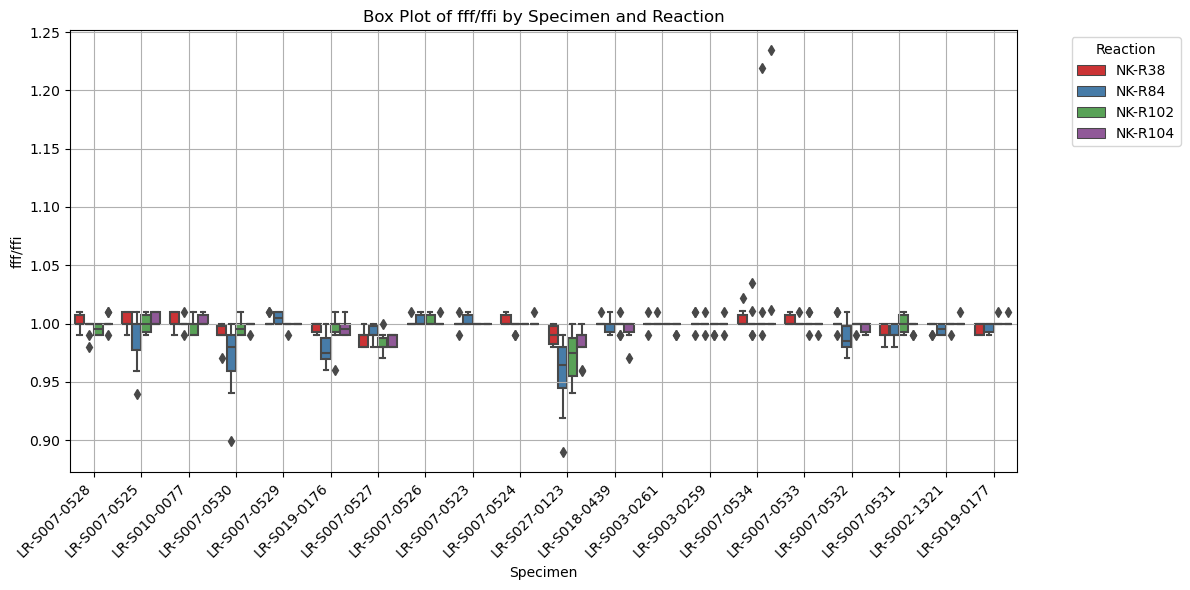

In [56]:
# 绘制箱线图
plt.figure(figsize=(12, 6))
sns.boxplot(x='specimen', y=y_axis, hue='reaction',
            data=filtered_data, palette="Set1", dodge=True)

plt.xlabel('Specimen')
plt.ylabel('fff/ffi')
plt.title('Box Plot of fff/ffi by Specimen and Reaction')
plt.xticks(rotation=45, ha='right')  # 旋转x轴标签
plt.legend(title='Reaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # 调整图表布局
plt.show()